In [21]:
import wave

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io.wavfile as wavfile
from scipy.fftpack import rfft, irfft, fftfreq, rfftfreq

%matplotlib inline

def high_pass_filter(freq, amp, min_freq):
    df = pd.DataFrame(amp, index=freq, columns=['Amplitude'])
    df = df.copy()
    df[df.index < min_freq] = 0
    return df

def low_pass_filter(freq, amp, max_freq):
    df = pd.DataFrame(amp, index=freq, columns=['Amplitude'])
    df = df.copy()
    df[df.index > max_freq] = 0
    return df

def band_pass_filter(freq, amp, min_freq, max_freq):
    df = pd.DataFrame(amp, index=freq, columns=['Amplitude'])
    df = df.copy()
    df[(df.index > max_freq) & (df.index < min_freq)] = 0
    return df

In [23]:
fs, aud = wavfile.read('/Volumes/Passport/LiveBeat/video/out.wav')
# wavfile.write('unfiltered_test.wav', fs, aud)

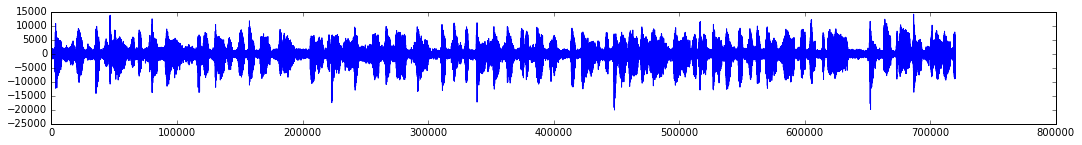

In [24]:
plt.figure(figsize=(18,2))
plt.plot(aud)
plt.show()

(0, 1e-06)

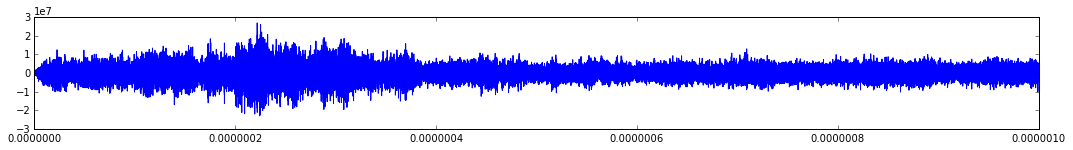

In [45]:
W = rfftfreq(len(aud), d=fs)
f_signal = rfft(aud)
fig = plt.figure(figsize=(18,2))
plt.plot(W, f_signal)
plt.xlim([0, .000001])

In [72]:
result = band_pass_filter(W, f_signal, .00000055, .000006)['Amplitude']
filtered = irfft(result, len(result))
filtered = np.asarray(filtered, dtype=np.int16)
wavfile.write('filtered_segment.wav', fs, filtered*.0001)

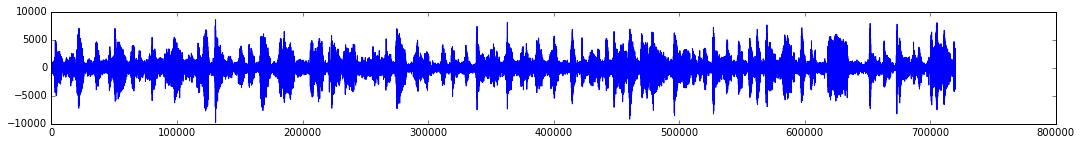

In [27]:
filtered = irfft(result['Amplitude'], len(result['Amplitude']))
fig = plt.figure(figsize=(18,2))
plt.plot(filtered)